In [ ]:
pip install pandas scikit-learn imbalanced-learn matplotlib seaborn


In [ ]:
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/sample_data/creditcard.csv')

# Display first few rows
print(data.head())

# Check for class imbalance
print(data['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [ ]:
# Check for missing values
print(data.isnull().sum())

# If there are missing values, we can fill them with the mean (for numerical columns)
data.fillna(data.mean(), inplace=True)


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64


In [ ]:
from sklearn.preprocessing import StandardScaler

# Assume all columns except the target label are features
X = data.drop('Class', axis=1)  # Drop the target column, changed 'fraudulent' to 'Class'
y = data['Class']  # Target column, changed 'fraudulent' to 'Class'

# Scale the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to oversample the minority class (fraudulent transactions)
smote = SMOTE(random_state=42)

# Check if 'y' contains only 0s and 1s. If not, it might be continuous.
# If 'y' is continuous, consider using a regression-based approach or converting 'y' to discrete classes.

# For example, if 'y' represents probabilities or scores, you might convert it to classes using a threshold:
# y_binary = (y > 0.5).astype(int)  # Replace 0.5 with an appropriate threshold

# Then, apply SMOTE to the binary target variable:
X_resampled, y_resampled = smote.fit_resample(X_scaled, y.astype(int)) # Convert y to integers

In [ ]:
from sklearn.model_selection import train_test_split

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print the evaluation metrics
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Calculate ROC AUC score
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])
print("ROC AUC Score: ", roc_auc)


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8738
           1       1.00      1.00      1.00      8681

    accuracy                           1.00     17419
   macro avg       1.00      1.00      1.00     17419
weighted avg       1.00      1.00      1.00     17419

[[8736    2]
 [   0 8681]]
ROC AUC Score:  0.9999999736337601


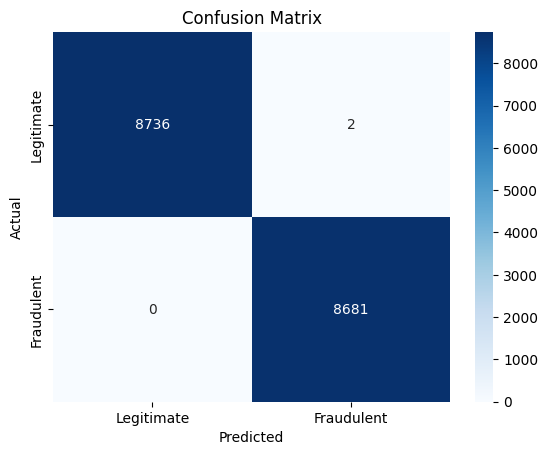

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion matrix visualization
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Legitimate", "Fraudulent"], yticklabels=["Legitimate", "Fraudulent"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import joblib

# Save the model to a file
joblib.dump(model, 'fraud_detection_model.pkl')

# Load the model later
# model = joblib.load('fraud_detection_model.pkl')


['fraud_detection_model.pkl']